# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
print("Beginning Data Retrieval\n-----------------------------\n")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

i=0
for city in cities:
    i = i+1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}" )
        responses.append(response)
    else:
        print("City not found. Skipping...")
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 | ushuaia
Processing Record 2 | broome
Processing Record 3 | kruisfontein
Processing Record 4 | mar del plata
Processing Record 5 | clyde river
Processing Record 6 | busselton
City not found. Skipping...
City not found. Skipping...
Processing Record 9 | punta arenas
Processing Record 10 | avarua
Processing Record 11 | mercedes
Processing Record 12 | atuona
Processing Record 13 | yellowknife
Processing Record 14 | baoding
Processing Record 15 | chokurdakh
Processing Record 16 | safaga
Processing Record 17 | arraial do cabo
Processing Record 18 | verkhoyansk
Processing Record 19 | shimoda
Processing Record 20 | kodiak
Processing Record 21 | sabang
Processing Record 22 | bredasdorp
Processing Record 23 | rikitea
Processing Record 24 | saint-philippe
Processing Record 25 | hobart
Processing Record 26 | victoria
City not found. Skipping...
Processing Record 28 | makakilo city
Processing Record 29 | bitung
Processing

Processing Record 252 | bandarbeyla
Processing Record 253 | medicine hat
Processing Record 254 | karratha
City not found. Skipping...
Processing Record 256 | longyearbyen
Processing Record 257 | bo rai
City not found. Skipping...
Processing Record 259 | port hedland
Processing Record 260 | ribeira grande
Processing Record 261 | carman
Processing Record 262 | krasnoselkup
Processing Record 263 | barsovo
Processing Record 264 | lisakovsk
Processing Record 265 | changji
Processing Record 266 | atar
Processing Record 267 | terme
Processing Record 268 | port augusta
Processing Record 269 | saint-pierre
Processing Record 270 | sabha
Processing Record 271 | post falls
Processing Record 272 | butaritari
Processing Record 273 | vardo
Processing Record 274 | zhoukou
City not found. Skipping...
Processing Record 276 | victor harbor
City not found. Skipping...
Processing Record 278 | jinxiang
Processing Record 279 | quang ngai
City not found. Skipping...
Processing Record 281 | woodward
Processing

Processing Record 502 | sumbe
Processing Record 503 | alice town
Processing Record 504 | kaspiysk
Processing Record 505 | kaeo
Processing Record 506 | iqaluit
Processing Record 507 | sobolevo
Processing Record 508 | polunochnoye
Processing Record 509 | havre-saint-pierre
Processing Record 510 | iquique
Processing Record 511 | samarinda
Processing Record 512 | vanderhoof
Processing Record 513 | talnakh
Processing Record 514 | okhotsk
Processing Record 515 | bathsheba
Processing Record 516 | rocha
Processing Record 517 | copiapo
Processing Record 518 | masvingo
Processing Record 519 | kavaratti
Processing Record 520 | tomatlan
Processing Record 521 | druzhba
Processing Record 522 | purpe
Processing Record 523 | fairbanks
Processing Record 524 | vestmanna
Processing Record 525 | wasilla
Processing Record 526 | poum
Processing Record 527 | fonte boa
Processing Record 528 | ozernovskiy
Processing Record 529 | emba
City not found. Skipping...
Processing Record 531 | hobyo
City not found. Ski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#create a list for each of the requested columns
city_list = []
lat_list = []
long_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


for resp in responses:
    city_list.append(resp['name'])
    lat_list.append(resp['coord']['lat'])
    long_list.append(resp['coord']['lon'])
    max_temp.append(resp['main']['temp_max'])
    cloudiness.append(resp['clouds']['all'])
    humidity.append(resp['main']['humidity'])
    wind_speed.append(resp['wind']['speed'])
    country.append(resp['sys']['country'])
    date.append(resp['dt'])


city_data = {
    'City': city_list,
    'Lat': lat_list,
    'Lng': long_list,
    'Max Temp': high_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

city_data_df = pd.DataFrame(city_data)

city_data_df.to_csv(output_data_file, index=False)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,35.60,93,75,24.16,AR,1603157210
1,Broome,42.25,-75.83,55.99,93,90,8.05,US,1603157265
2,Kruisfontein,-34.00,24.73,60.01,70,100,4.00,ZA,1603157265
3,Mar del Plata,-38.00,-57.56,54.00,62,0,16.11,AR,1603157265
4,Clyde River,70.47,-68.59,32.00,91,1,18.34,CA,1603157265


In [12]:
#get the stats so we can check if there is a city with too high of humidity
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,18.148475,20.947712,59.704229,72.928943,48.597920,7.685667,1.603157e+09
std,34.556273,91.583600,20.267311,20.149359,41.024398,5.485189,5.228235e+01
min,-54.800000,-179.170000,9.030000,9.000000,0.000000,0.600000,1.603157e+09
25%,-11.210000,-58.420000,42.480000,62.000000,1.000000,3.670000,1.603157e+09
50%,19.930000,24.200000,64.150000,78.000000,43.000000,6.040000,1.603157e+09
75%,49.000000,104.890000,77.000000,88.000000,90.000000,10.290000,1.603157e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,40.260000,1.603157e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#From the data in the stats box abivem there is no max humidity over 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

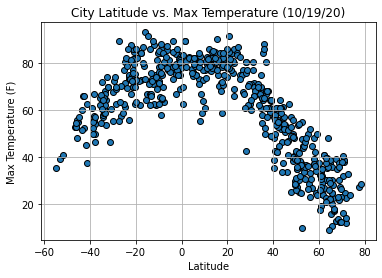

In [14]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (10/19/20)')
plt.savefig('output_data/CityLatitudeVsMaxTemp.png')

## Latitude vs. Humidity Plot

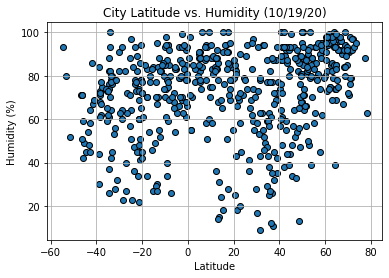

In [15]:
 x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (10/19/20)')
plt.savefig('output_data/CityLatitudeVsHumidity.png')

## Latitude vs. Cloudiness Plot

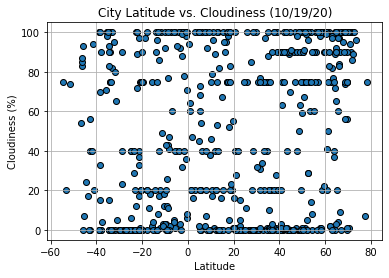

In [16]:
 x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (10/19/20)')
plt.savefig('output_data/CityLatitudeVsCloudiness.png')

## Latitude vs. Wind Speed Plot

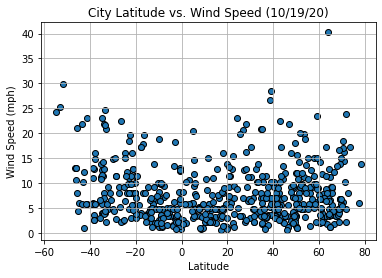

In [17]:
 x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (10/19/20)')
plt.savefig('output_data/CityLatitudeVsWindSpeed.png')

## Linear Regression

In [18]:
 def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
no_hem_df = city_data_df.loc[city_data_df['Lat'] > 0, :]
so_hem_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

The r-squared is: -0.8934955999200016


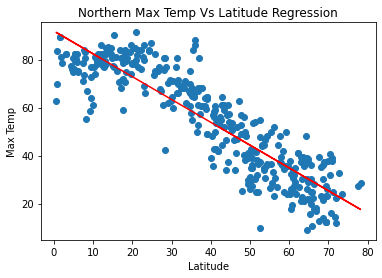

In [23]:
linear_reg_plot(no_hem_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernMaxTempVsLatitudeReg.png', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.722964456208312


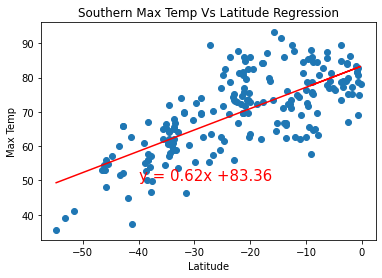

In [26]:
linear_reg_plot(so_hem_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernMaxTempVsLatitudeReg.png', (-40,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21672271646042318


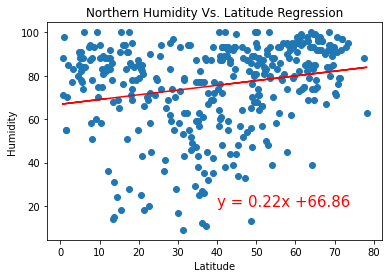

In [25]:
linear_reg_plot(no_hem_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityVsLatitudeReg.png', (40,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23233983558280674


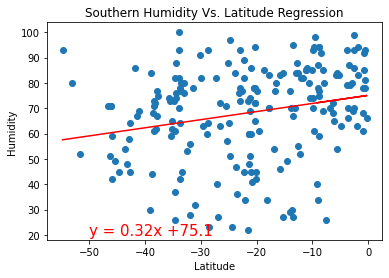

In [27]:
linear_reg_plot(so_hem_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityVsLatitudeReg.png', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25844609512728045


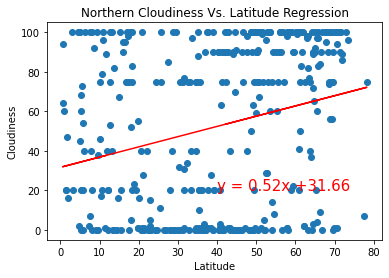

In [28]:
linear_reg_plot(no_hem_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessVsLatitudeReg.png', (40,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.054700051814717994


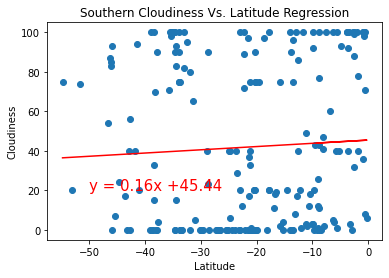

In [29]:
linear_reg_plot(so_hem_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessVsLatitudeReg.png', (-50,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14857042798841963


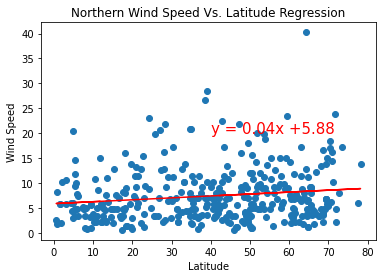

In [30]:
linear_reg_plot(no_hem_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWindSpeedVsLatitudeReg.png', (40,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.39990794551958686


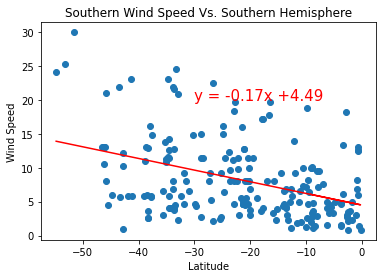

In [31]:
linear_reg_plot(so_hem_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWindSpeedVsLatitudeReg.png', (-30,20))